# Tratamientode variables categóricas

In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [142]:
df = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')

In [143]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [144]:
dummy_gender = pd.get_dummies(df['Gender'], prefix = 'Gender')

dummy_city_tier = pd.get_dummies(df['City Tier'], prefix = 'City')

In [145]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [146]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [147]:
column_names = df.columns.values.tolist()

column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [148]:
df_new = df[column_names].join(dummy_gender)

column_names = df_new.columns.values.tolist()

df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [149]:
df_new = df_new[column_names].join(dummy_city_tier)

df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [150]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [151]:
X = df_new[feature_cols]

Y = df_new["Total Spend"]

In [152]:
lm = LinearRegression()

lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
lm.intercept_

-79.417130301371799

In [154]:
lm.coef_

array([  1.47538980e-01,   1.54946125e-01,  -1.31025013e+02,
         1.31025013e+02,   7.67643260e+01,   5.51389743e+01,
        -1.31903300e+02,   7.72233446e+02])

In [155]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.764326010495125),
 ('City_Tier 2', 55.138974309232502),
 ('City_Tier 3', -131.90330031972769),
 ('Record', 772.23344574456451)]

In [156]:
lm.score(X, Y)

0.91799235861310158

El modelo puede ser escrito como:
    Total_Spend = -79.417130301371799 + 'Monthly Income' * 0.14753898049205738 + 
    'Transaction Time' * 0.15494612549589634 + 'Gender_Female' * -131.02501325554624 + 
    'Gender_Male' * 131.02501325554607 + 'City_Tier 1' * 76.764326010495125 +
    'City_Tier 2' * 55.138974309232502 + 'City_Tier 3' * -131.90330031972769 +
    'Record' * 772.23344574456451

In [157]:
df_new["prediction"] = -79.417130301371799 + df_new['Monthly Income'] * 0.14753898049205738 + df_new['Transaction Time'] * 0.15494612549589634 + df_new['Gender_Female'] * -131.02501325554624 + df_new['Gender_Male'] * 131.02501325554607 + df_new['City_Tier 1'] * 76.764326010495125 + df_new['City_Tier 2'] * 55.138974309232502 + df_new['City_Tier 3'] * -131.90330031972769 + df_new['Record'] * 772.23344574456451

In [158]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [159]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"]) ** 2)

In [160]:
SSD

1517733985.340816

In [161]:
RSE = np.sqrt(SSD / (len(df_new) - len(feature_cols) - 1))

In [162]:
RSE

803.13188098181649

In [163]:
sales_mean = np.mean(df_new["Total Spend"])

In [164]:
sales_mean

6163.176415976714

In [165]:
error = RSE / sales_mean

In [166]:
error * 100

13.031135680294161

## Eliminar variables dummy redundantes

In [167]:
dummy_gender = pd.get_dummies(df['Gender'], prefix = 'Gender').iloc[:, 1:]

In [168]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [169]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix = 'City').iloc[:, 1:]

In [170]:
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [171]:
column_names = df.columns.values.tolist()

df_new = df[column_names].join(dummy_gender)

column_names = df_new.columns.values.tolist()

df_new = df_new[column_names].join(dummy_city_tier)

df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [172]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']

X = df_new[feature_cols]

Y = df_new['Total Spend']

lm = LinearRegression()

lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
lm.intercept_

-133.67781754642238

In [174]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.05002651109481),
 ('City_Tier 2', -21.625351701262758),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [175]:
lm.score(X, Y)

0.91799235861310158

# Transformación de variables para conseguir una relación no lineal

In [176]:
import pandas as pd

In [177]:
data_auto = pd.read_csv('../datasets/auto/auto-mpg.csv')

In [178]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [179]:
data_auto.shape

(406, 9)

In [180]:
import matplotlib.pyplot as plt

In [181]:
%matplotlib inline

Text(0.5,1,'CV vs MPG')

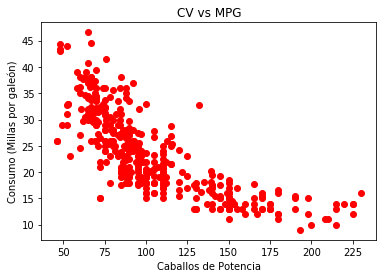

In [182]:
data_auto['mpg'] = data_auto['mpg'].dropna()

data_auto['horsepower'] = data_auto['horsepower'].dropna()

plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')

plt.xlabel('Caballos de Potencia')

plt.ylabel('Consumo (Millas por galeón)')

plt.title('CV vs MPG')

### Modelo de regresión lineal!
* mpg = a + b * horsepower

In [202]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())

Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

X_data = X[:, np.newaxis]

In [203]:
lm = LinearRegression()

lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
%matplotlib inline

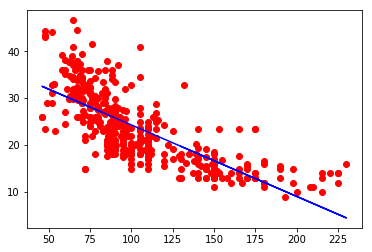

In [205]:
plt.plot(X, Y, 'ro')

plt.plot(X, lm.predict(X_data), color = 'blue')

In [206]:
lm.score(X_data, Y)

0.57465334064502505

In [207]:
SSD = np.sum((Y - lm.predict(X_data)) ** 2)

RSE = np.sqrt(SSD / (len(X_data) -1))

y_mean = np.mean(Y)

error = RSE / y_mean

SSD, RSE, y_mean, error * 100

(10315.751960060919, 5.0468794808255106, 23.51457286432162, 21.46277336163346)

## Modelo de regresión cuadratico
* mpg = a + b * horsepower ^ 2

In [208]:
X_data = X ** 2

X_data = X_data[:, np.newaxis]

In [209]:
lm = LinearRegression()

lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [210]:
lm.score(X_data, Y)

0.48498870348232048

In [211]:
SSD = np.sum((Y - lm.predict(X_data)) ** 2)

RSE = np.sqrt(SSD / (len(X_data) -1))

y_mean = np.mean(Y)

error = RSE / y_mean

SSD, RSE, y_mean, error * 100

(12490.350340501926, 5.5534107727698174, 23.51457286432162, 23.616889852998099)

# Modelo de regresión lineal y cuadratico
* mpg = a + b horsepower + c horsepower ^ 2

In [212]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [213]:
poly = PolynomialFeatures(degree = 2)

In [214]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [215]:
lm = linear_model.LinearRegression()

In [216]:
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [218]:
lm.score(X_data, Y)

0.6439066584257469

In [219]:
lm.intercept_

55.026192447080362

In [220]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - 0.434 * hp + 0.00112615 * hp ^ 2

In [236]:
for d in range(2, 12):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print("R2: ", lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:  0.643906658426
55.0261924471
[ 0.         -0.43404318  0.00112615]
SSD: 8636.18064352, RSE: 4.61778115804, Y_mean: 23.51457286432162, error: 19.6379546619%
Regresión de grado 3
R2:  0.644467888556
58.4487741119
[  0.00000000e+00  -5.27113167e-01   1.89736722e-03  -1.95723195e-06]
SSD: 8622.56936743, RSE: 4.6141407363, Y_mean: 23.51457286432162, error: 19.622473106%
Regresión de grado 4
R2:  0.64676741897
40.0966438481
[  0.00000000e+00   1.62563541e-01  -7.10892744e-03   4.65580255e-05
  -9.15840093e-08]
SSD: 8566.79983249, RSE: 4.59919473158, Y_mean: 23.51457286432162, error: 19.5589125013%
Regresión de grado 5
R2:  0.654751248937
-40.6938128968
[  0.00000000e+00   4.00021432e+00  -7.54801920e-02   6.19621369e-04
  -2.36220932e-06   3.41982935e-09]
SSD: 8373.17139364, RSE: 4.54692173544, Y_mean: 23.51457286432162, error: 19.3366120732%
Regresión de grado 6
R2:  0.657284462493
-157.073182443
[  0.00000000e+00   1.07623366e+01  -2.30128498e-01   2.40537386e-03


In [233]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred) ** 2)
    RSE = np.sqrt(SSD / (len(X_data) - 1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    print("SSD: " + str(SSD) + ", RSE: " + str(RSE) + ", Y_mean: " + str(y_mean) + ", error: " + str(error * 100) + "%")

# El problema de los outliers

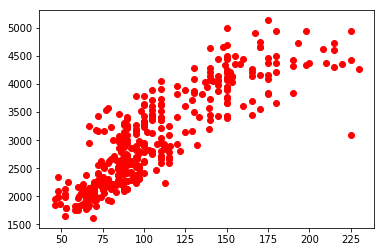

In [237]:
plt.plot(data_auto['horsepower'], data_auto['weight'], 'ro')

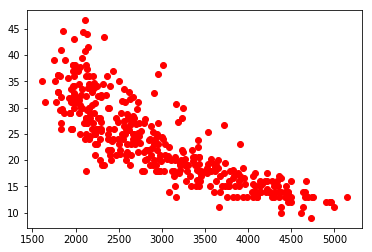

In [238]:
plt.plot(data_auto['weight'], data_auto['mpg'], 'ro')

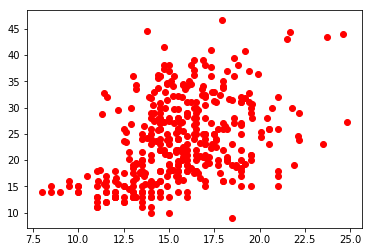

In [239]:
plt.plot(data_auto['acceleration'], data_auto['mpg'], 'ro')

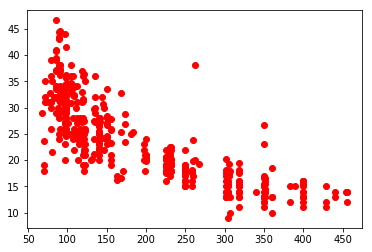

In [240]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')

In [242]:
X = data_auto['displacement'].fillna(data_auto['displacement'].mean())

X = X[:, np.newaxis]

Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

lm = LinearRegression()

lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [243]:
lm.score(X, Y)

0.62610497628269179

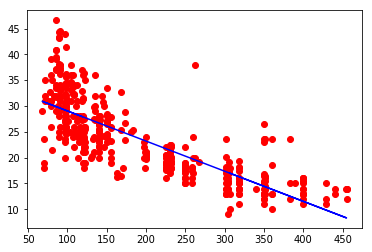

In [246]:
%matplotlib inline

plt.plot(X, Y, 'ro')

plt.plot(X, lm.predict(X), color = 'blue')

In [249]:
data_auto[(data_auto['displacement'] > 250) & (data_auto['mpg'] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [254]:
data_auto[(data_auto['displacement'] > 300) & (data_auto['mpg'] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [257]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [258]:
X = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())

X = X[:, np.newaxis]

Y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())

lm = LinearRegression()

lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [259]:
lm.score(X, Y)

0.64665143175318218

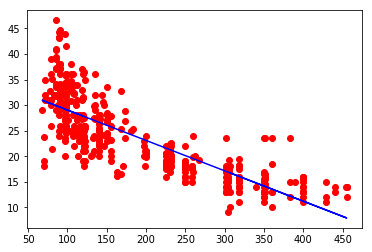

In [260]:
%matplotlib inline

plt.plot(X, Y, 'ro')

plt.plot(X, lm.predict(X), color = 'blue')